In [1]:
import tensorflow as tf
tfe = tf.contrib.eager
tf.enable_eager_execution()

In [2]:
class Model(object):
    def __init__(self):
        self.W = tfe.Variable(5.0)
        self.b = tfe.Variable(0.0)

    def __call__(self, x):
        return self.W * x + self.b

model = Model()

In [3]:
# stardard L2 loss
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [7]:
# Obtain training data
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random_normal(shape=[NUM_EXAMPLES])
noise = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

# import matplotlib.pyplot as plt
 
# plt.scatter(inputs, outputs, c='b')
# plt.scatter(inputs, model(inputs), c='r')
# plt.show()

print('Current loss: '),
print(loss(model(inputs), outputs).numpy())

Current loss: 
9.394242


In [8]:
# Define a training loop
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dw, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=9.39424
Epoch  1: W=4.58 b=0.42, loss=6.23149
Epoch  2: W=4.24 b=0.75, loss=4.25487
Epoch  3: W=3.98 b=1.01, loss=3.01922
Epoch  4: W=3.78 b=1.23, loss=2.24656
Epoch  5: W=3.62 b=1.39, loss=1.76329
Epoch  6: W=3.49 b=1.53, loss=1.46094
Epoch  7: W=3.40 b=1.64, loss=1.27172
Epoch  8: W=3.32 b=1.72, loss=1.15327
Epoch  9: W=3.26 b=1.79, loss=1.07910


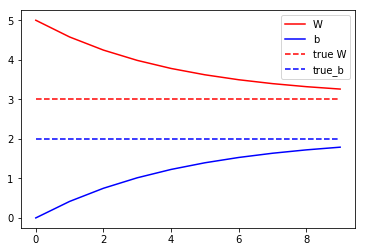

In [9]:
# let's see how W and b evolve
model = Model()
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)

    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))

import matplotlib.pyplot as plt

plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()